In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/valorant-esports-top-earnings/Players.csv
/kaggle/input/valorant-esports-top-earnings/Teams.csv


In [2]:
print(os.getcwd())

/kaggle/working


In [3]:
players_df=pd.read_csv("/kaggle/input/valorant-esports-top-earnings/Players.csv")
teams_df=pd.read_csv("/kaggle/input/valorant-esports-top-earnings/Teams.csv")

print(players_df.shape)
print(teams_df.shape)

(500, 7)
(402, 7)


In [4]:
print(f"Players info : {players_df.info()}")
print(f"Teams info : {teams_df.info()}")
print(f"{players_df.head(5)}")
print(f"{teams_df.head(5)}")

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   Rank      500 non-null    int64 
 1   Player    500 non-null    object
 2   Gold      500 non-null    int64 
 3   Silver    500 non-null    int64 
 4   Bronze    500 non-null    int64 
 5   S Tier    500 non-null    int64 
 6   Earnings  500 non-null    object
dtypes: int64(5), object(2)
memory usage: 27.5+ KB
Players info : None
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 402 entries, 0 to 401
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   Rank      402 non-null    int64 
 1   Team      402 non-null    object
 2   Gold      402 non-null    int64 
 3   Silver    402 non-null    int64 
 4   Bronze    402 non-null    int64 
 5   S Tier    402 non-null    int64 
 6   Earnings  402 non-null    object
dtypes: int64(5), object(2)
memory us

In [5]:
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [6]:
players_df.Earnings = (
    players_df.Earnings
    .str.replace('$', '', regex=False)
    .str.replace(',', '', regex=False)
    .astype(int)
)

In [7]:
teams_df.Earnings = (
    teams_df.Earnings
    .str.replace('$', '', regex=False)
    .str.replace(',', '', regex=False)
    .astype(int)
)

In [8]:
[features for features in players_df.columns if players_df[features].isnull().sum()>0]

[]

In [9]:
[features for features in teams_df.columns if teams_df[features].isnull().sum()>0]

[]

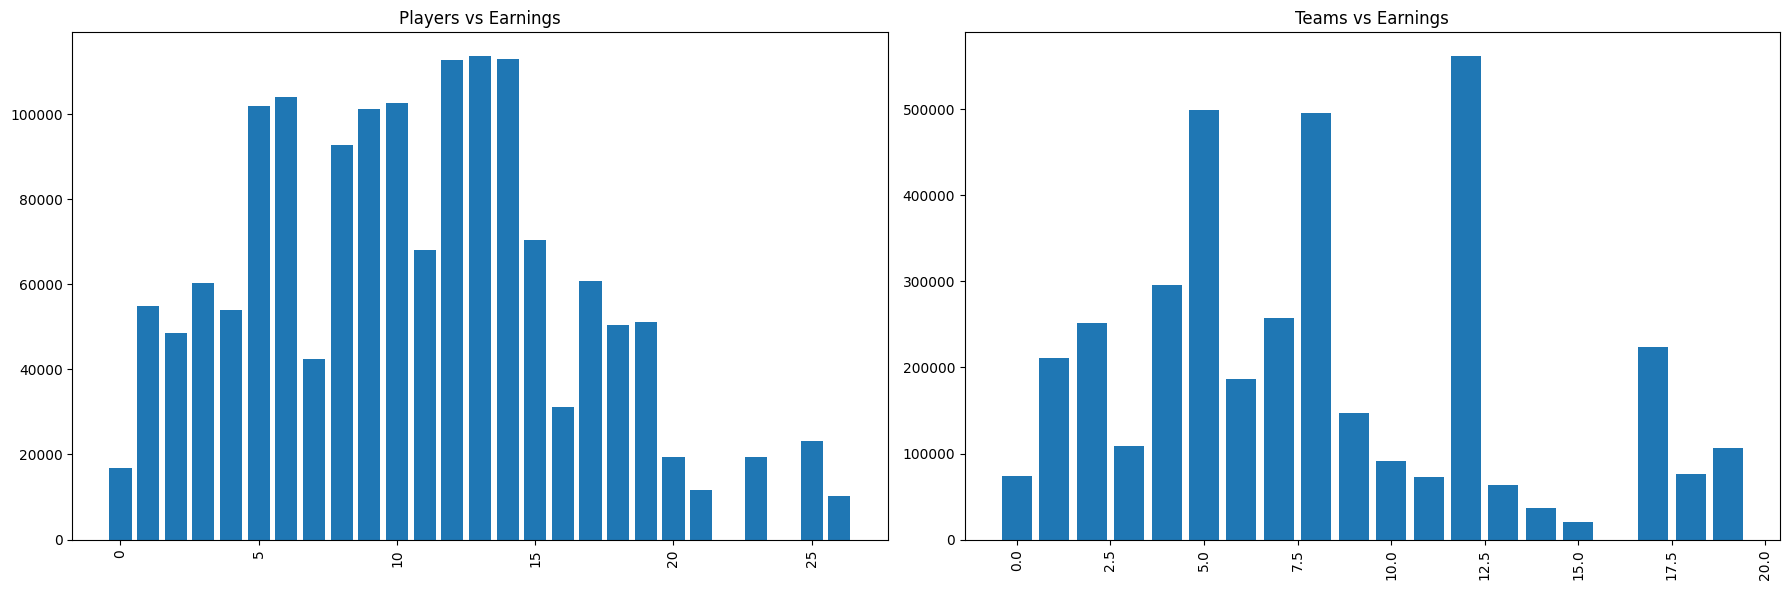

In [10]:
fig, axes = plt.subplots(1, 2, figsize=(18, 6))

# Players subplot
axes[0].bar(players_df['Gold'], players_df['Earnings'])
axes[0].set_title("Players vs Earnings")
axes[0].tick_params(axis='x', rotation=90)

# Teams subplot
axes[1].bar(teams_df['Gold'], teams_df['Earnings'])
axes[1].set_title("Teams vs Earnings")
axes[1].tick_params(axis='x', rotation=90)

plt.tight_layout()
plt.show()

In [11]:
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans

In [12]:
features = ["Gold", "Silver", "Bronze", "S Tier", "Earnings"]

X = players_df[features]

In [13]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

/usr/local/lib/python3.11/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/cluster/_kmeans.py:8

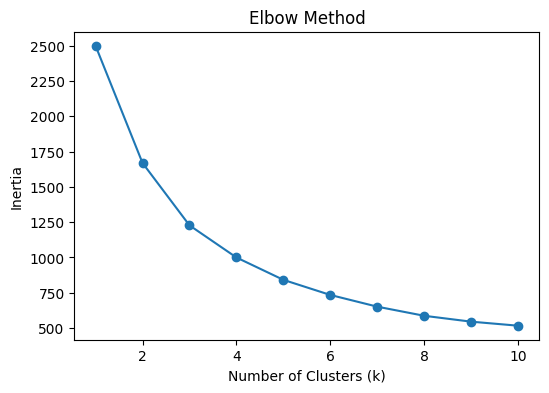

In [14]:
inertia = []
K = range(1, 11)

for k in K:
    km = KMeans(n_clusters=k, random_state=42)
    km.fit(X_scaled)
    inertia.append(km.inertia_)

plt.figure(figsize=(6,4))
plt.plot(K, inertia, marker='o')
plt.xlabel("Number of Clusters (k)")
plt.ylabel("Inertia")
plt.title("Elbow Method")
plt.show()

In [15]:
k = 4
kmeans = KMeans(n_clusters=k, random_state=42)
players_df["Cluster"] = kmeans.fit_predict(X_scaled)

/usr/local/lib/python3.11/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


In [16]:
players_df.groupby("Cluster")[features].mean()

,Gold,Silver,Bronze,S Tier,Earnings
Cluster,,,,,
0,11.140127,4.598726,1.191083,0.0,19449.961783
1,3.685106,2.536170,1.221277,0.0,13196.689362
2,11.066667,4.000000,1.133333,1.0,104805.400000
3,7.258065,6.978495,3.677419,0.0,11789.075269


In [17]:
# from sklearn.decomposition import PCA

# pca = PCA(n_components=2)
# components = pca.fit_transform(X_scaled)

# players_df["PC1"] = components[:, 0]
# players_df["PC2"] = components[:, 1]

# plt.figure(figsize=(8,6))

# # --- Plot each cluster separately so legend works ---
# for cluster in players_df["Cluster"].unique():
#     cluster_data = players_df[players_df["Cluster"] == cluster]
#     plt.scatter(
#         cluster_data["PC1"],
#         cluster_data["PC2"],
#         label=f"Cluster {cluster}"
#     )

# plt.xlabel("PC1")
# plt.ylabel("PC2")
# plt.title("Player Clusters (PCA Visualization)")
# plt.legend(title="Clusters")
# plt.show()

In [18]:
cluster_profile = players_df.groupby("Cluster")[["Gold", "Silver", "Bronze", "S Tier", "Earnings"]].mean()
print(cluster_profile)

# Score clusters to decide names automatically
cluster_profile["score"] = (
      cluster_profile["Gold"] * 3
    + cluster_profile["Silver"] * 2
    + cluster_profile["Bronze"]
    + cluster_profile["S Tier"] * 5
    + cluster_profile["Earnings"] / 10000
)

# Rank clusters (highest score = best performers)
ranked_clusters = cluster_profile["score"].rank(ascending=False).astype(int)

cluster_label_map = {}

for cluster in cluster_profile.index:
    rank = ranked_clusters.loc[cluster]
    
    if rank == 1:
        cluster_label_map[cluster] = "Superstar"
    elif rank == 2:
        cluster_label_map[cluster] = "High Performer"
    elif rank == 3:
        cluster_label_map[cluster] = "Grinder"
    else:
        cluster_label_map[cluster] = "Low Performer"

cluster_label_map

              Gold    Silver    Bronze  S Tier       Earnings
Cluster                                                      
0        11.140127  4.598726  1.191083     0.0   19449.961783
1         3.685106  2.536170  1.221277     0.0   13196.689362
2        11.066667  4.000000  1.133333     1.0  104805.400000
3         7.258065  6.978495  3.677419     0.0   11789.075269


{0: 'High Performer', 1: 'Low Performer', 2: 'Superstar', 3: 'Grinder'}

In [19]:
players_df["Cluster_Label"] = players_df["Cluster"].map(cluster_label_map)

In [20]:
from sklearn.decomposition import PCA

pca = PCA(n_components=2, random_state=42)
components = pca.fit_transform(X_scaled)

players_df["PC1"] = components[:, 0]
players_df["PC2"] = components[:, 1]

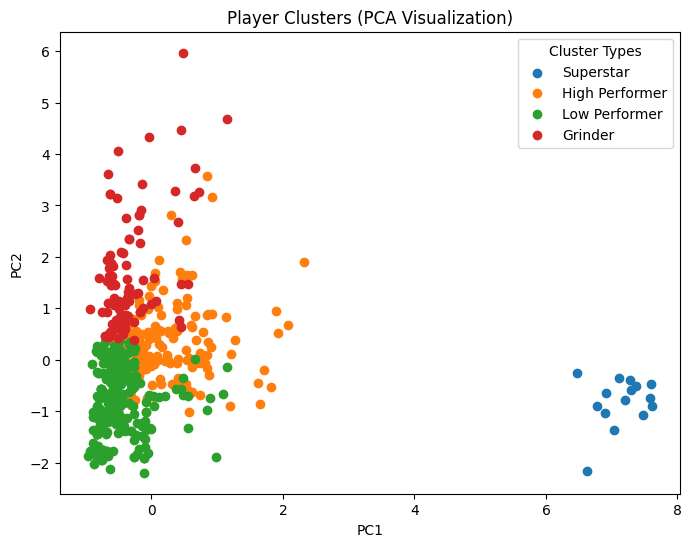

In [21]:
plt.figure(figsize=(8,6))

for cluster in players_df["Cluster"].unique():
    cluster_data = players_df[players_df["Cluster"] == cluster]
    plt.scatter(
        cluster_data["PC1"],
        cluster_data["PC2"],
        label=cluster_label_map[cluster]
    )

plt.xlabel("PC1")
plt.ylabel("PC2")
plt.title("Player Clusters (PCA Visualization)")
plt.legend(title="Cluster Types")
plt.show()
